In [9]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

In [46]:
data_file="data\\data_capitalisation_.csv"
df=pd.read_csv(data_file)
df.head()

,date,capitalisation
0,01-08-2023,627 172 472 158.05
1,31-07-2023,625 475 975 096.93
2,28-07-2023,624 686 609 334.37
3,27-07-2023,621 941 620 963.30
4,26-07-2023,613 942 840 391.74


In [48]:
dic=df.to_dict( 'records')
correction=[]
for e in dic:
    correction.append({
        "date" : datetime.strptime(str(e["date"]),'%d-%m-%Y'),
        "capitalisation" : float("".join(e["capitalisation"].split()))
    })

dfc= pd.DataFrame(correction)
dfc.head()

,date,capitalisation
0,2023-08-01,6.271725e+11
1,2023-07-31,6.254760e+11
2,2023-07-28,6.246866e+11
3,2023-07-27,6.219416e+11
4,2023-07-26,6.139428e+11


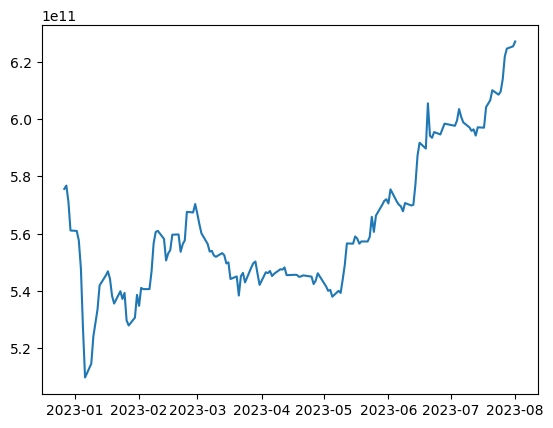

In [51]:
dfc=dfc.sort_values("date")
plt.plot(dfc["date"], dfc["capitalisation"])

In [56]:
res={
    "volatilité" : float(np.std(dfc["capitalisation"])**2),
    "moyen"      : float(np.mean(dfc["capitalisation"])),
    "eacrt-type" : float(np.std(dfc["capitalisation"])),
}
print(json.dumps(res, ensure_ascii=False,indent=1))

{
 "volatilité": 5.878579244075363e+20,
 "moyen": 561779459160.1812,
 "eacrt-type": 24245781579.638474
}


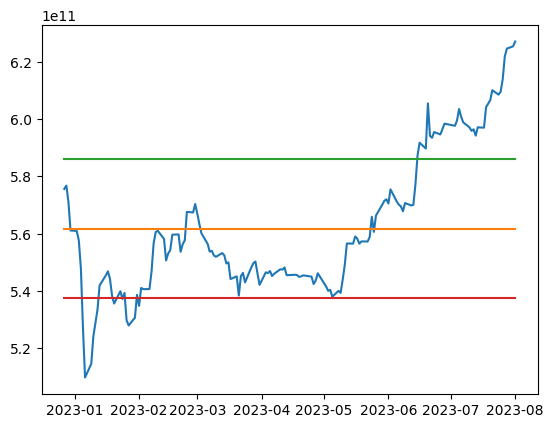

In [61]:
ligne_moyenne=[res["moyen"]  for _ in range(len(dfc["capitalisation"]))]
ligne_ets    =[res["moyen"]+res["eacrt-type"]  for _ in range(len(dfc["capitalisation"]))]
ligne_eti    =[res["moyen"]-res["eacrt-type"]  for _ in range(len(dfc["capitalisation"]))]
plt.plot(dfc["date"], dfc["capitalisation"])
plt.plot(dfc["date"], ligne_moyenne)
plt.plot(dfc["date"], ligne_ets)
plt.plot(dfc["date"], ligne_eti)

(array([ 2.,  5., 27., 46., 23., 16.,  3., 17.,  7.,  4.]),
 array([5.09731071e+11, 5.21475211e+11, 5.33219351e+11, 5.44963492e+11,
        5.56707632e+11, 5.68451772e+11, 5.80195912e+11, 5.91940052e+11,
        6.03684192e+11, 6.15428332e+11, 6.27172472e+11]),
 <BarContainer object of 10 artists>)

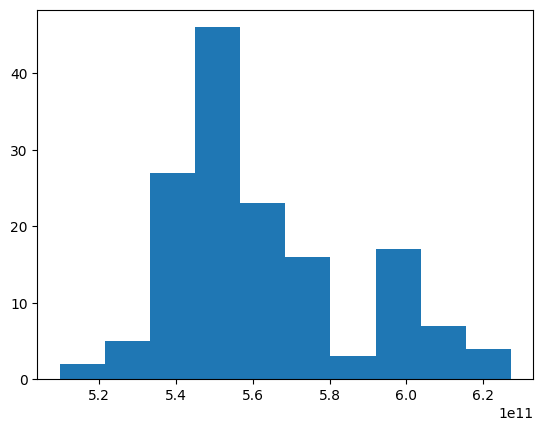

In [62]:
plt.hist(dfc["capitalisation"])

In [85]:
def generate_browniene_curve(v0, std, number_of_samples):
    li=[v0]
    for i in range(number_of_samples):
        b = np.random.binomial(n=1, p=0.5)
        x = np.random.uniform(0, 1)*std
        if i!=0:
            if b==1:
                li.append(li[i-1]+x)
            else:
                li.append(li[i-1]-x)
    return li
            
        
        

575635025248.63 24245781579.638474


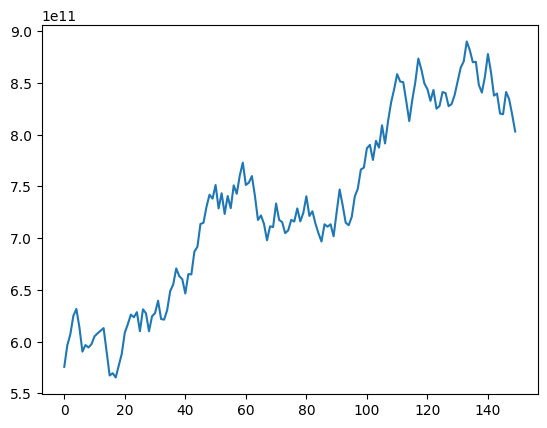

In [92]:
v0=dfc.to_dict('records')[0]["capitalisation"]
std=res["eacrt-type"]
print(v0,std)
brown=generate_browniene_curve(v0=v0, std=std, number_of_samples=150)
plt.plot(brown)

575635025248.63 24245781579.638474 150


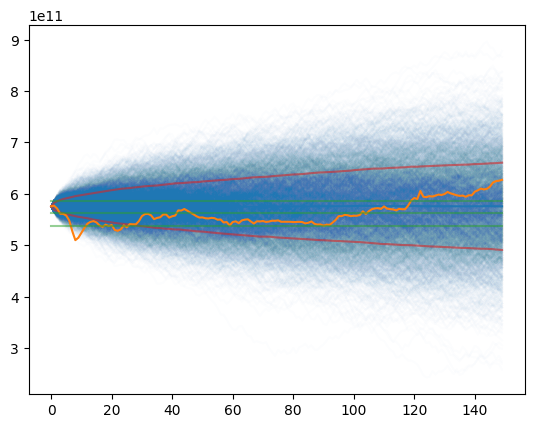

In [168]:
v0=dfc.to_dict('records')[0]["capitalisation"]
std=res["eacrt-type"]
nbs=int(len(dfc)/1)
print(v0,std,nbs)


total=[]
for _ in range(3000):
    brown=generate_browniene_curve(v0=v0, std=std*0.5, number_of_samples=nbs)
    total.append(brown)
    plt.plot(brown,color='C0', alpha=0.01)

moyenne_brown=list(np.array(total).mean(axis=0))
mbpstd=list(np.array(total).mean(axis=0)+np.array(total).std(axis=0))
mbmstd=list(np.array(total).mean(axis=0)-np.array(total).std(axis=0))

plt.plot(moyenne_brown,color='C0', alpha=1.0)
plt.plot(mbpstd,color='C3', alpha=0.6)
plt.plot(mbmstd,color='C3', alpha=0.6)

capitalisation= list(dfc["capitalisation"])
ligne_moyenne=[res["moyen"]  for _ in range(len(dfc["capitalisation"]))]
ligne_ets    =[res["moyen"]+res["eacrt-type"]  for _ in range(len(dfc["capitalisation"]))]
ligne_eti    =[res["moyen"]-res["eacrt-type"]  for _ in range(len(dfc["capitalisation"]))]

plt.plot(capitalisation,color='C1', alpha=1.0)
plt.plot(ligne_moyenne,color='C2', alpha=0.5)
plt.plot(ligne_ets,color='C2', alpha=0.5)
plt.plot(ligne_eti,color='C2', alpha=0.5)

en somme il parait que la modelisation brownienne de l'évolution de la capitalisation offre une bonne approximation de l'évolution de ses bornes 